# The Sparks Foundation 

# Data Science & Business Analytics Internship

## Task 3: Exploratory Data Analysis (Retail)

### By Shubham Durgude

In [45]:
#Importing all libraries required
%matplotlib inline
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [46]:
df=pd.read_csv('SampleSuperstore.csv')

In [47]:
df.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [49]:
df.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [50]:
df.shape

(9994, 13)

In [51]:
df.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

### Exploratory Data Analysis

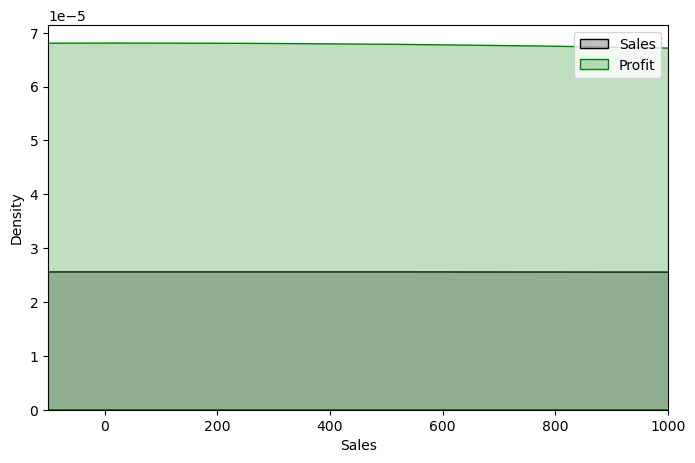

In [52]:
plt.figure(figsize=(8,5))
sns.kdeplot(df['Sales'],color='black',label='Sales',shade=True,bw=25)
sns.kdeplot(df['Profit'],color='g',label='Profit',shade=True,bw=25)
plt.xlim([-100,1000])
plt.legend()
plt.show()

### Analysis Using Pairplot for Each Column

### 1)Based on Category

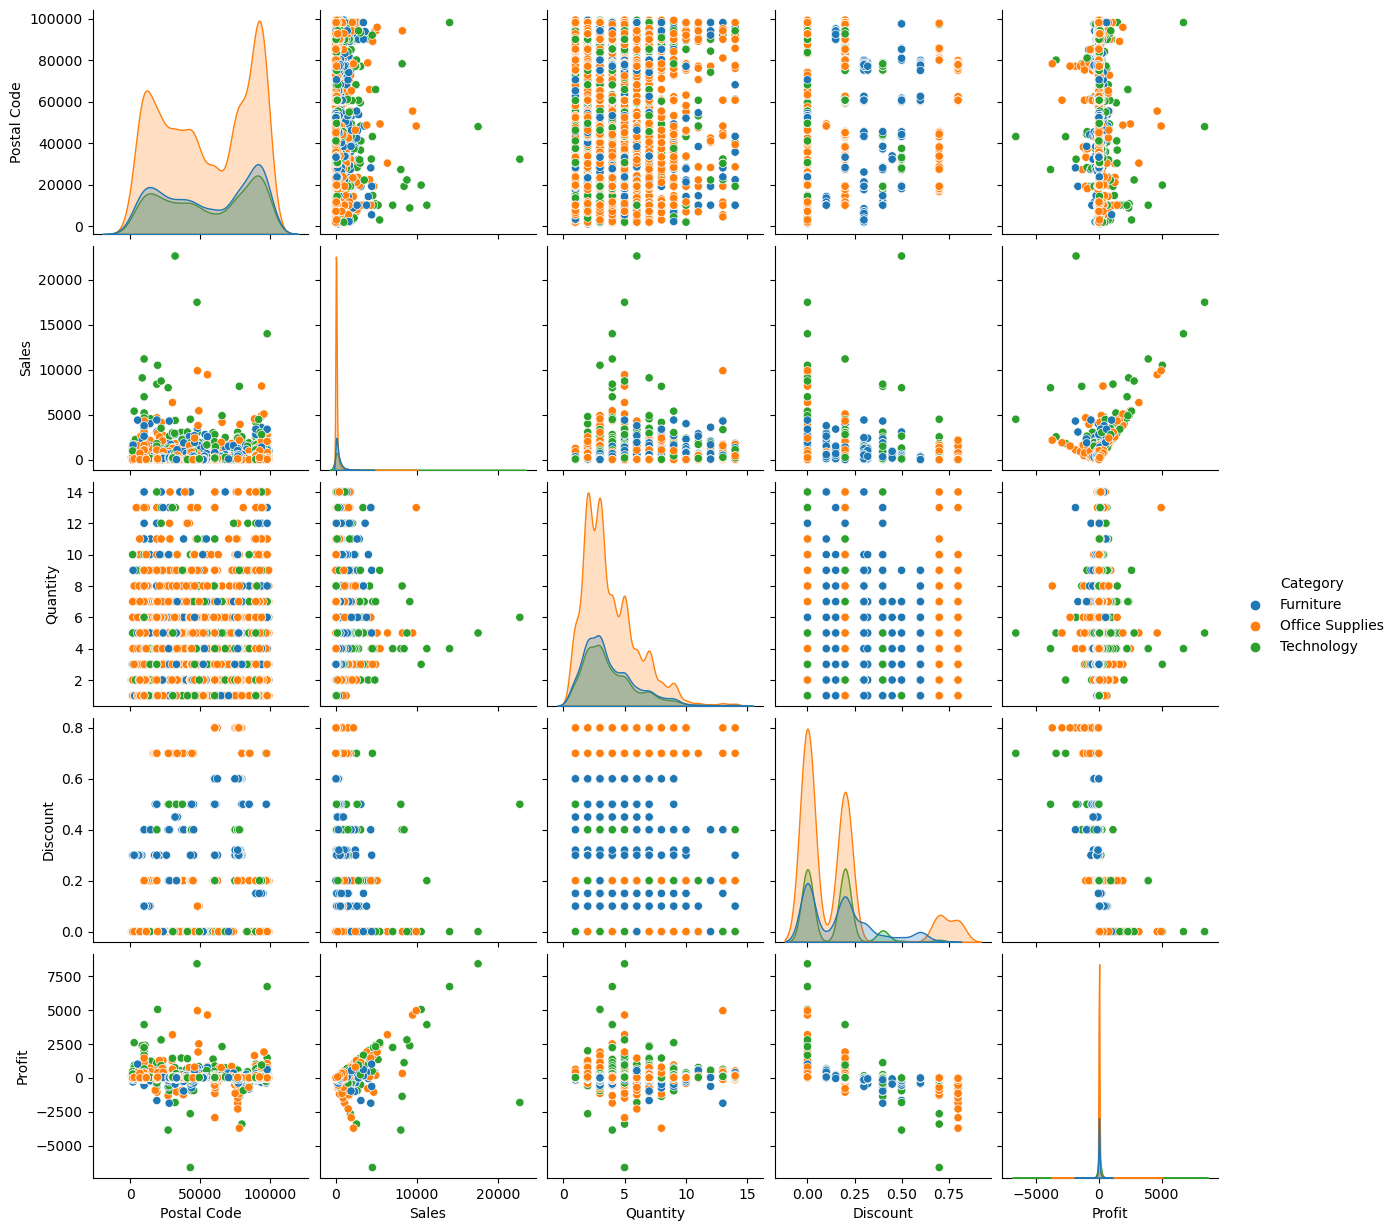

In [73]:
sns.pairplot(df,hue='Category')
plt.show()

### 2)Based on Region 

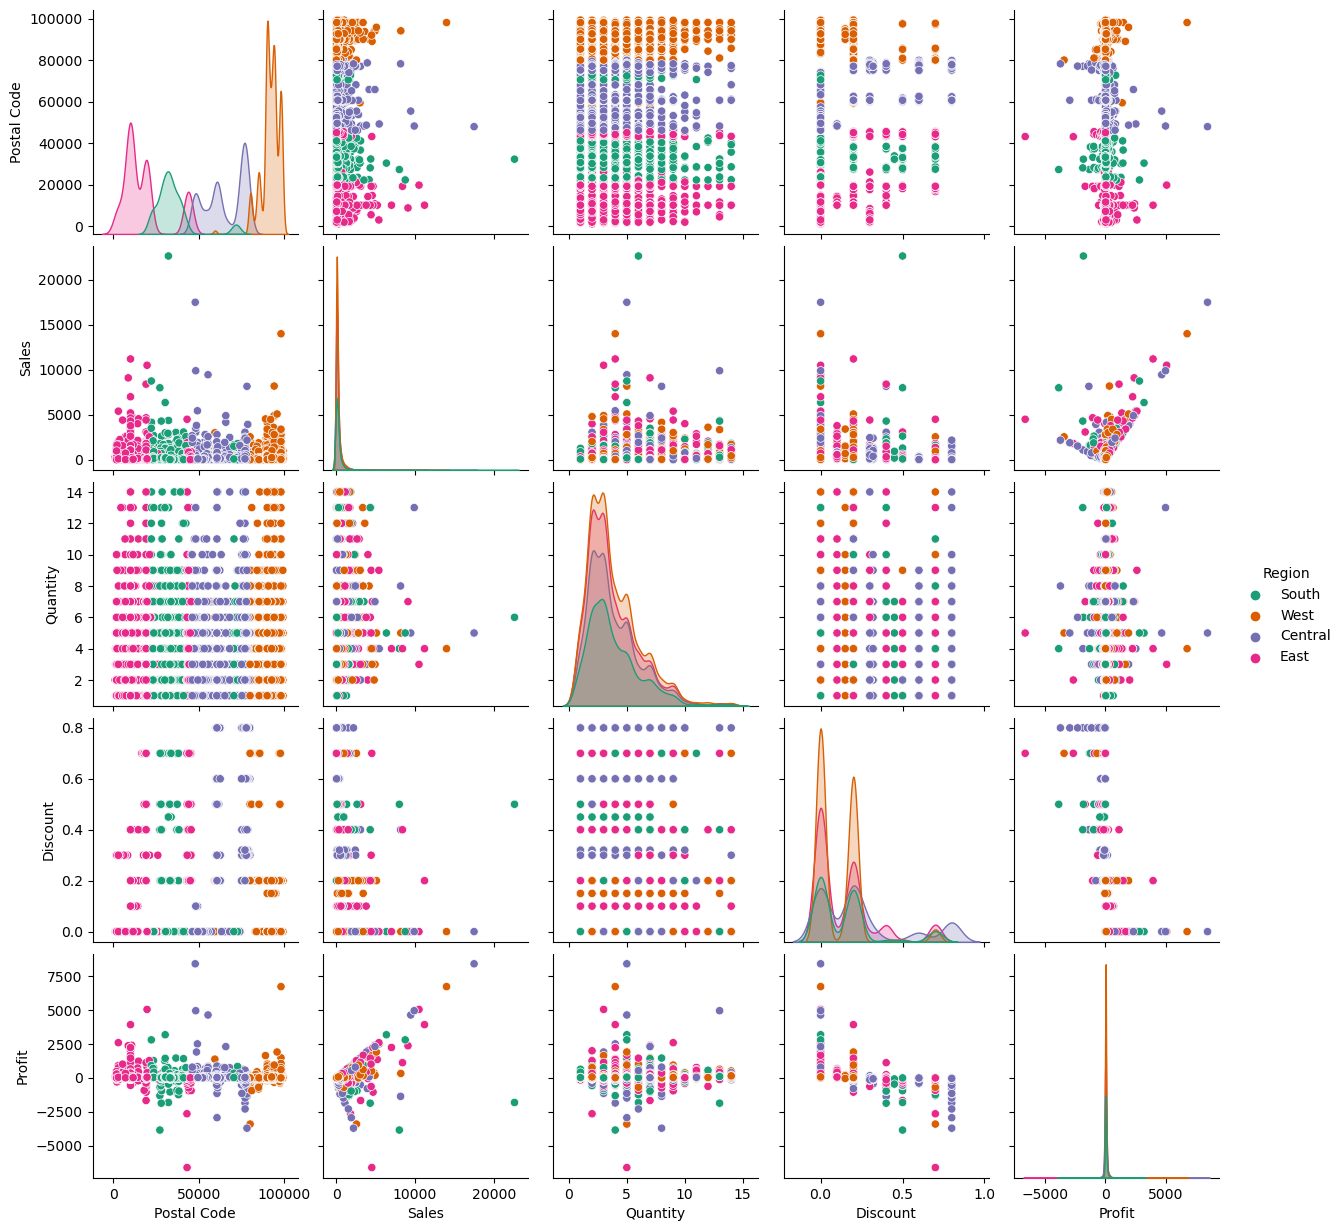

In [75]:
sns.pairplot(df,hue='Region',palette='Dark2')
plt.show()

In [55]:
df.corr()

,Postal Code,Sales,Quantity,Discount,Profit
Postal Code,1.000000,-0.023854,0.012761,0.058443,-0.029961
Sales,-0.023854,1.000000,0.200795,-0.028190,0.479064
Quantity,0.012761,0.200795,1.000000,0.008623,0.066253
Discount,0.058443,-0.028190,0.008623,1.000000,-0.219487
Profit,-0.029961,0.479064,0.066253,-0.219487,1.000000


### Heatmap for Correlation

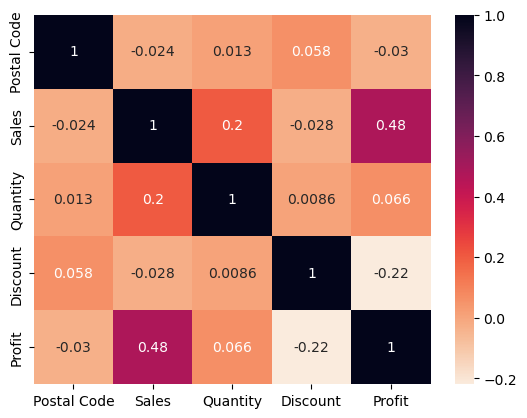

In [56]:
sns.heatmap(df.corr(),cmap='rocket_r',annot=True)
plt.show()

### From above heatmap :

Sales and profit are moderately correlated.

Discount and Profit are negatively correlated.

Quantity and Profit are less moderately correlated.

### Countplot of each column

### Distribution of the data using plot

<function matplotlib.pyplot.show(close=None, block=None)>

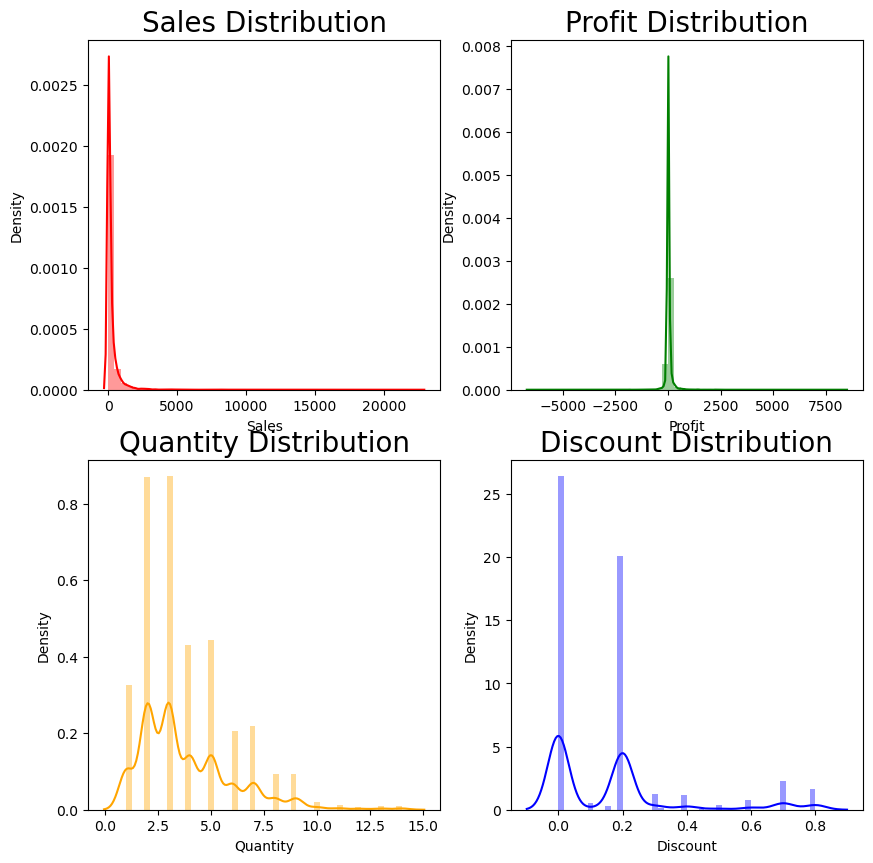

In [72]:
fig , axs = plt.subplots(ncols=2,nrows=2,figsize=(10,10))
sns.distplot(df['Sales'],color='red',ax= axs[0][0])
sns.distplot(df['Profit'],color='green',ax=axs[0][1])
sns.distplot(df['Quantity'],color='orange',ax=axs[1][0])
sns.distplot(df['Discount'],color='blue',ax=axs[1][1])
axs[0][0].set_title('Sales Distribution',fontsize=20)
axs[0][1].set_title('Profit Distribution',fontsize=20)
axs[1][0].set_title('Quantity Distribution',fontsize=20)
axs[1][1].set_title('Discount Distribution',fontsize=20)
plt.show

### Statewise Deal Analysis

In [76]:
df['Country'].value_counts()

United States    9994
Name: Country, dtype: int64

In [77]:
df1=df['State'].value_counts()
df1.head(10)

California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Name: State, dtype: int64

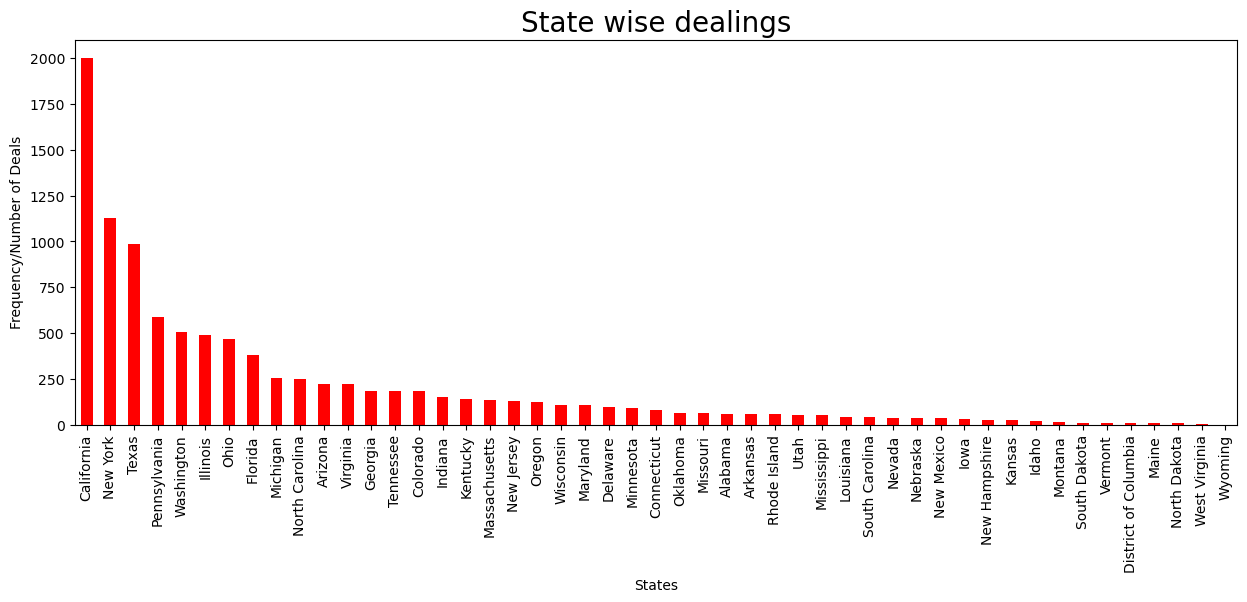

In [82]:
df1.plot(kind='bar',figsize=(15,5),color='red')
plt.xlabel('States')
plt.ylabel('Frequency/Number of Deals')

plt.title('State wise dealings',fontsize=20)
plt.show()

### Here is top 3 states where deals are highest

1)California<br>
2)New York<br>
3)Texas<br>

### Wyoming : Lowest number of deal.

In [83]:
df['State'].value_counts().mean()

203.9591836734694

### Average number of deal per state is 204.

### City wise analysis of dealing

In [84]:
df2=df['City'].value_counts()
df2=df2.head(50)

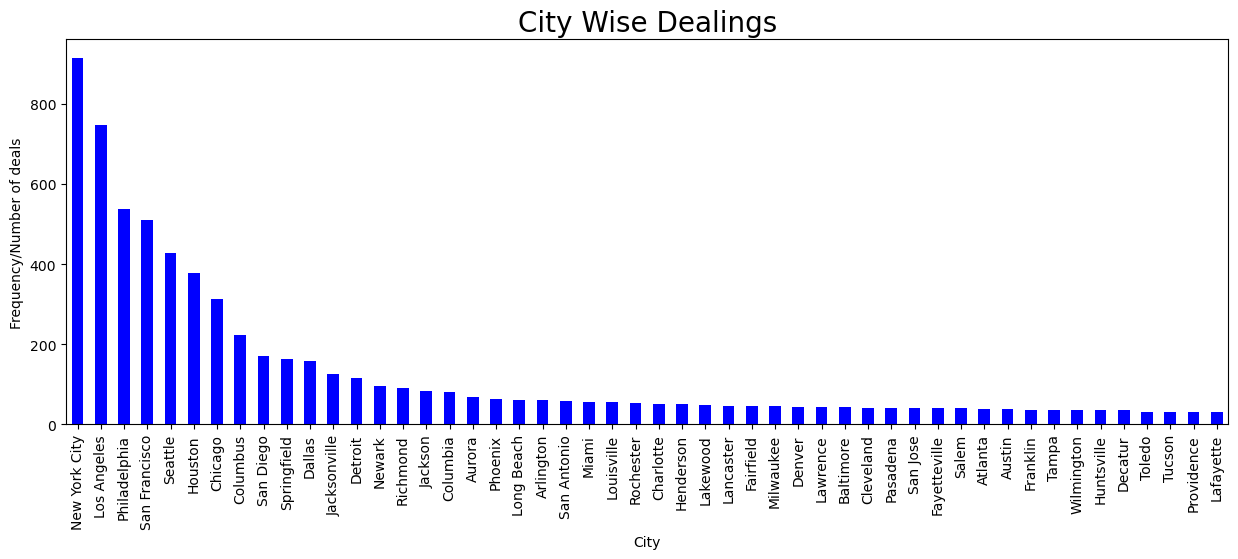

In [85]:
df2.plot(kind='bar',figsize=(15,5),color='blue')
plt.ylabel('Frequency/Number of deals')
plt.xlabel('City')

plt.title('City Wise Dealings',fontsize=20)
plt.show()

### Here is the top 3 cities where deals are highest

1)New York city<br>
2)Los Angeles<br>
3)Philadelphia

In [87]:
df['City'].value_counts().mean()

18.821092278719398

### Average number of deal per city is 19.

### Segment wise analysis of Profit ,Discount and Sell

In [88]:
df['Segment'].value_counts()

Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

In [89]:
df_segment=df.groupby(['Segment'])[['Sales','Discount','Profit']].mean()
df_segment

,Sales,Discount,Profit
Segment,,,
Consumer,223.733644,0.158141,25.836873
Corporate,233.823300,0.158228,30.456667
Home Office,240.972041,0.147128,33.818664


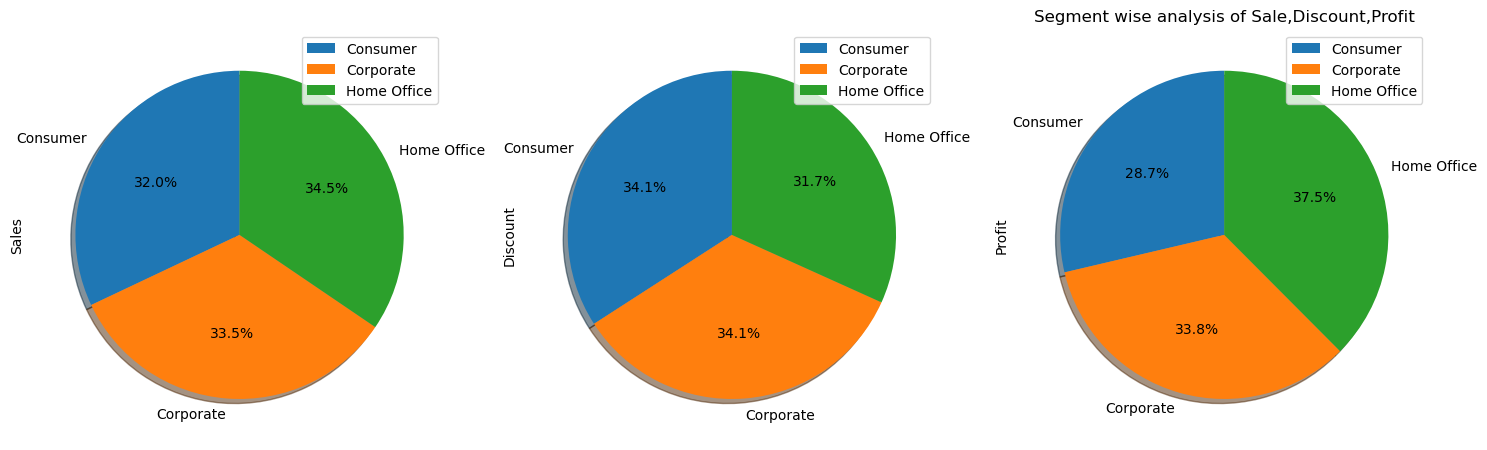

In [91]:
#1. Sales 2.Discount 3.Profit
df_segment.plot.pie(subplots=True,
                   autopct='%1.1f%%',
                   figsize=(18,20),
                   startangle=90,
                   shadow=True,
                   labels=df_segment.index)
plt.title('Segment wise analysis of Sale,Discount,Profit')
plt.show()

Sales:<br>

Consumer=32%<br>
Corporate=33.5%<br>
Home office=34.5%<br>

Discount:<br>

Consumer=15.8%<br>
Corporate=15.8%<br>
Home office=14.7%<br>

Profit:<br>

Consumer=28.7%<br>
Corporate=33.8%<br>
Home office=37.5%<br>

### State wise analysis of Profit, Discount and sell

In [93]:
df['State'].value_counts().head(10)

California        2001
New York          1128
Texas              985
Pennsylvania       587
Washington         506
Illinois           492
Ohio               469
Florida            383
Michigan           255
North Carolina     249
Name: State, dtype: int64

In [95]:
df_state=df.groupby(['State'])[['Sales','Discount','Profit']].mean()
df_state.head(10)

,Sales,Discount,Profit
State,,,
Alabama,319.846557,0.000000,94.865989
Arizona,157.508933,0.303571,-15.303235
Arkansas,194.635500,0.000000,66.811452
California,228.729451,0.072764,38.171608
Colorado,176.418231,0.316484,-35.867351
Connecticut,163.223866,0.007317,42.823071
Delaware,285.948635,0.006250,103.930988
District of Columbia,286.502000,0.000000,105.958930
Florida,233.612815,0.299347,-8.875461


### Statewise profit analysis

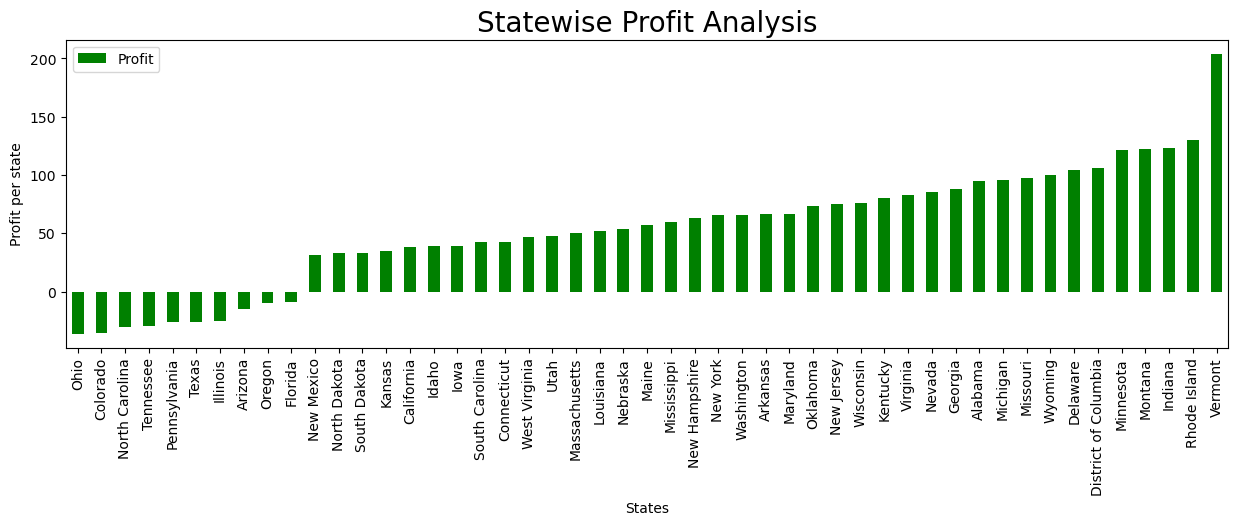

In [96]:
df_state1=df_state.sort_values('Profit')

df_state1[['Profit']].plot(kind='bar',figsize=(15,4),color='green')
plt.title('Statewise Profit Analysis',fontsize=20)
plt.ylabel('Profit per state')
plt.xlabel('States')
plt.show()

### Result

Vermont:Highest Profit<br>
Ohio:Lowest Profit

### State wise Sale Analysis

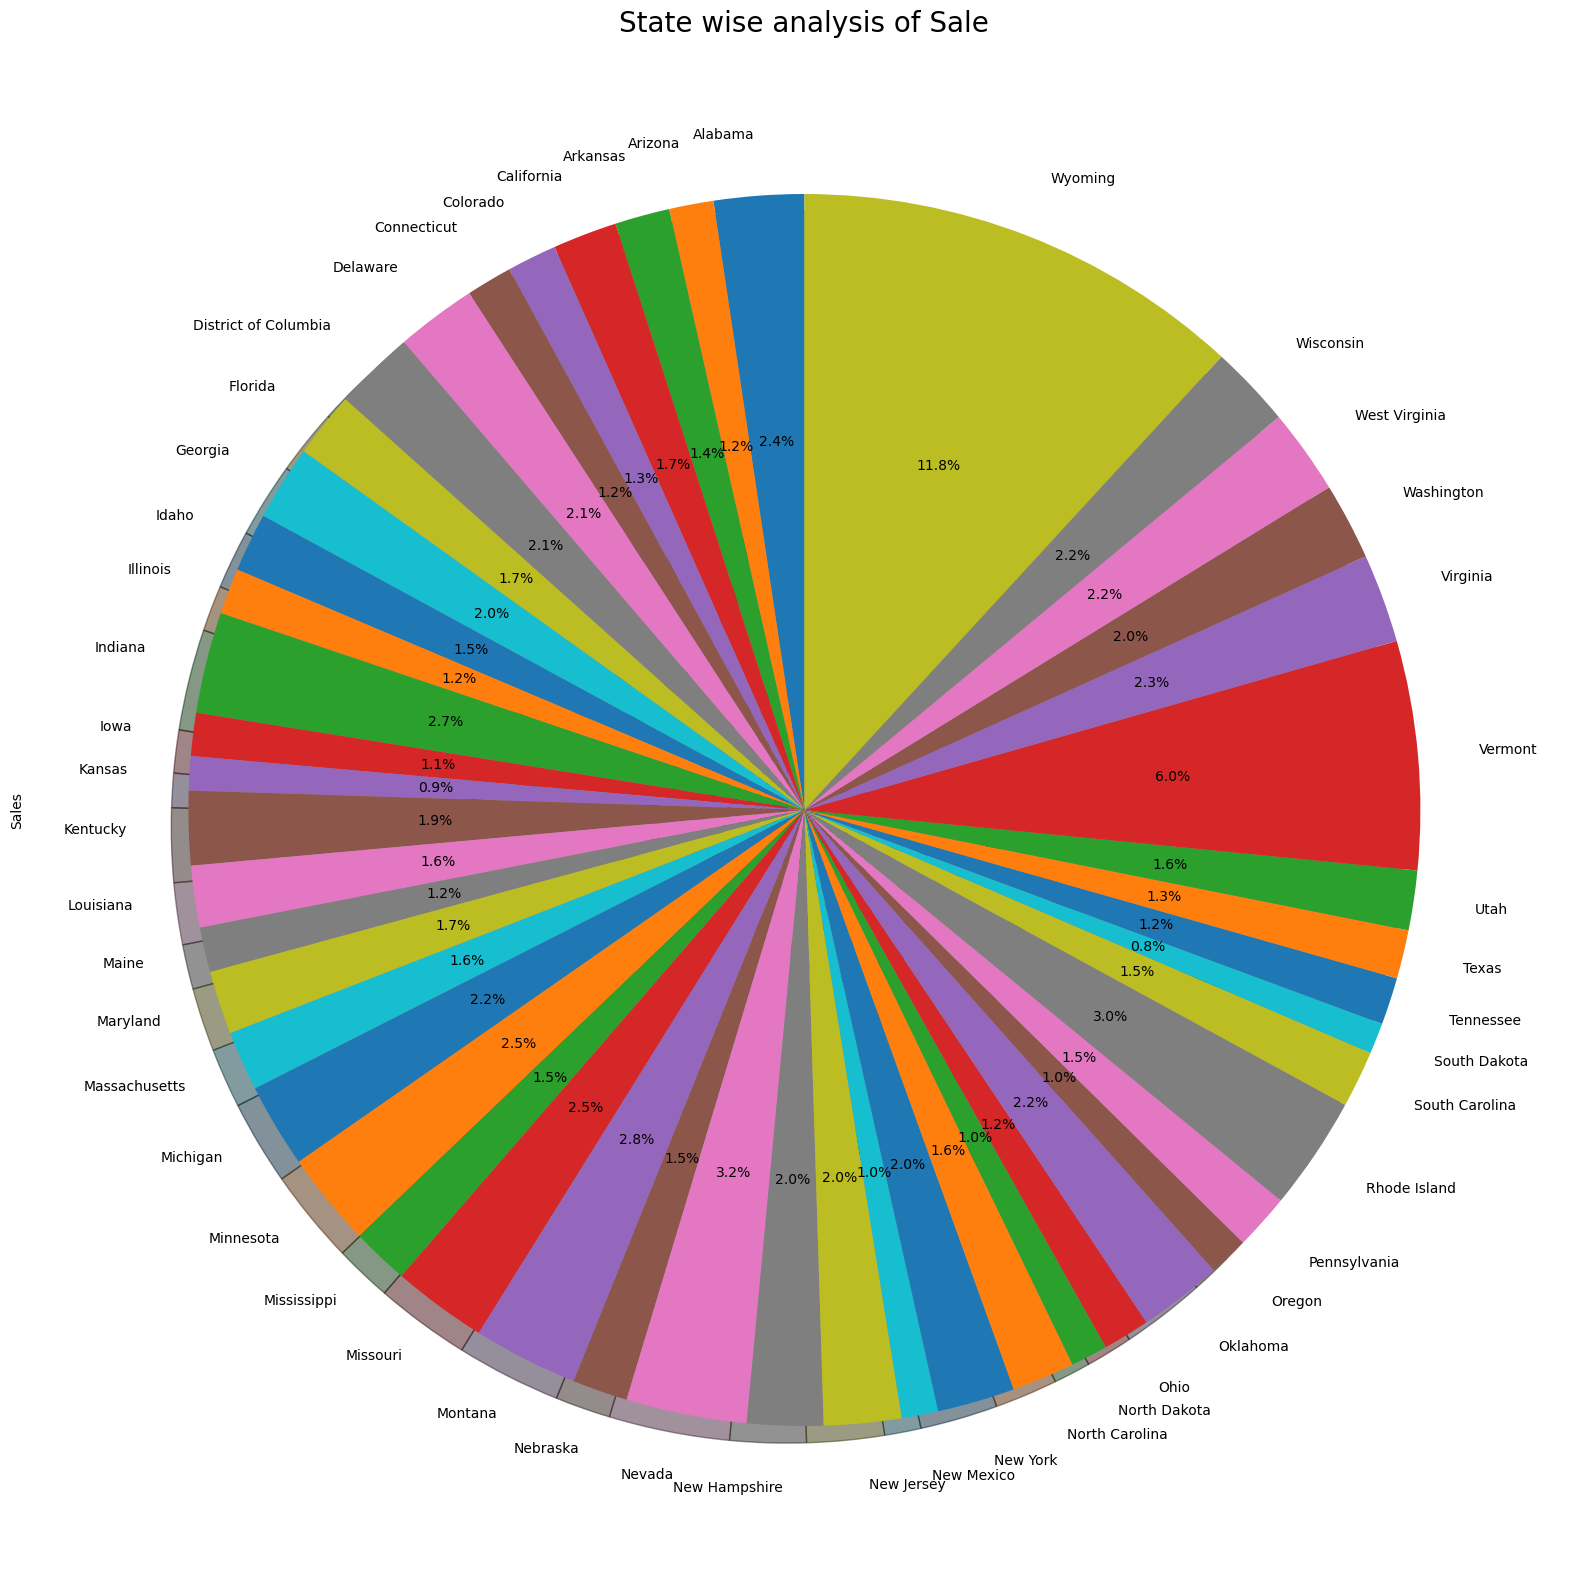

In [98]:
df_state['Sales'].plot(kind='pie',
                      figsize=(20,20),
                      autopct='%1.1f%%',
                       startangle=90,
                       shadow=True
                      )
plt.title('State wise analysis of Sale',fontsize=20)
plt.show()

Highest amount of sales=Wyoming(11.8%)<br>
Lowest amount of sales=South Dakota(0.8%)

### Statewise Discount Analysis

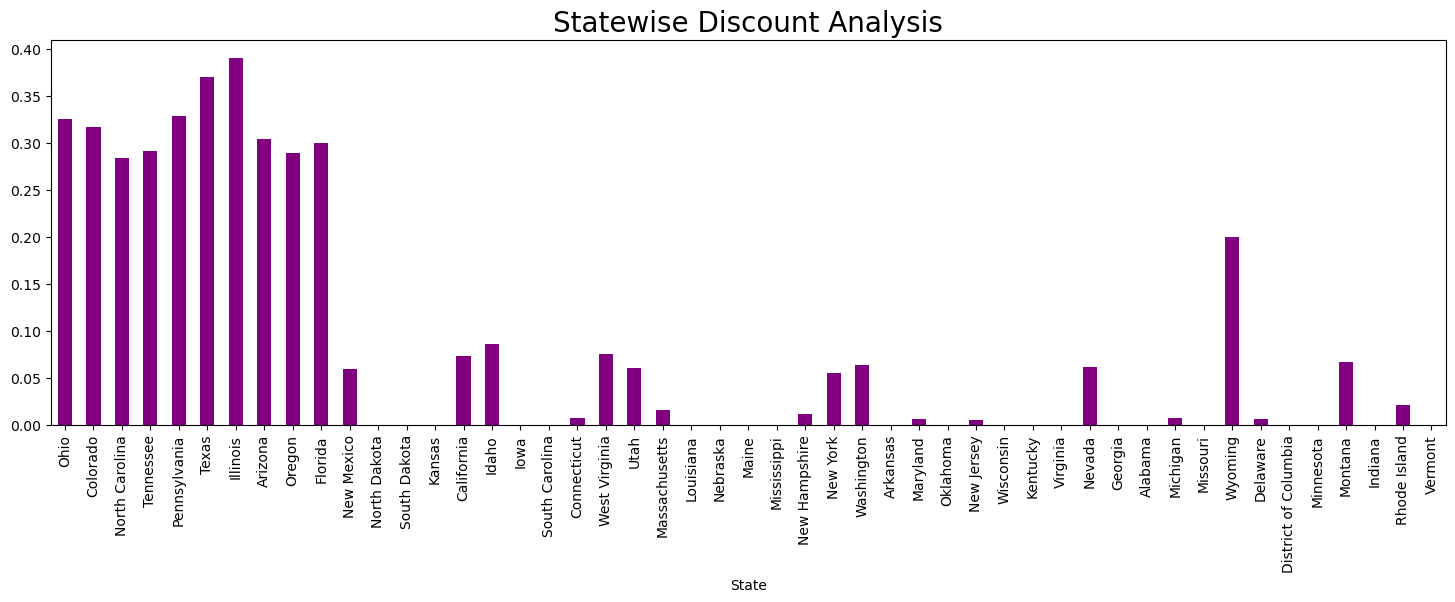

In [100]:
df_state1['Discount'].plot(kind='bar',figsize=(18,5),color='purple')
plt.title('Statewise Discount Analysis',fontsize=20)
plt.show()

### Illinois at the top.

### Citywise Analysis Of The Profit

In [102]:
df_city=df.groupby(['City'])[['Sales','Discount','Profit']].mean()
df_city=df_city.sort_values('Profit')
df_city.head()

,Sales,Discount,Profit
City,,,
Bethlehem,337.926800,0.380000,-200.619160
Champaign,151.960000,0.600000,-182.352000
Oswego,107.326000,0.600000,-178.709200
Round Rock,693.436114,0.274286,-169.061614
Lancaster,215.031826,0.315217,-157.371052


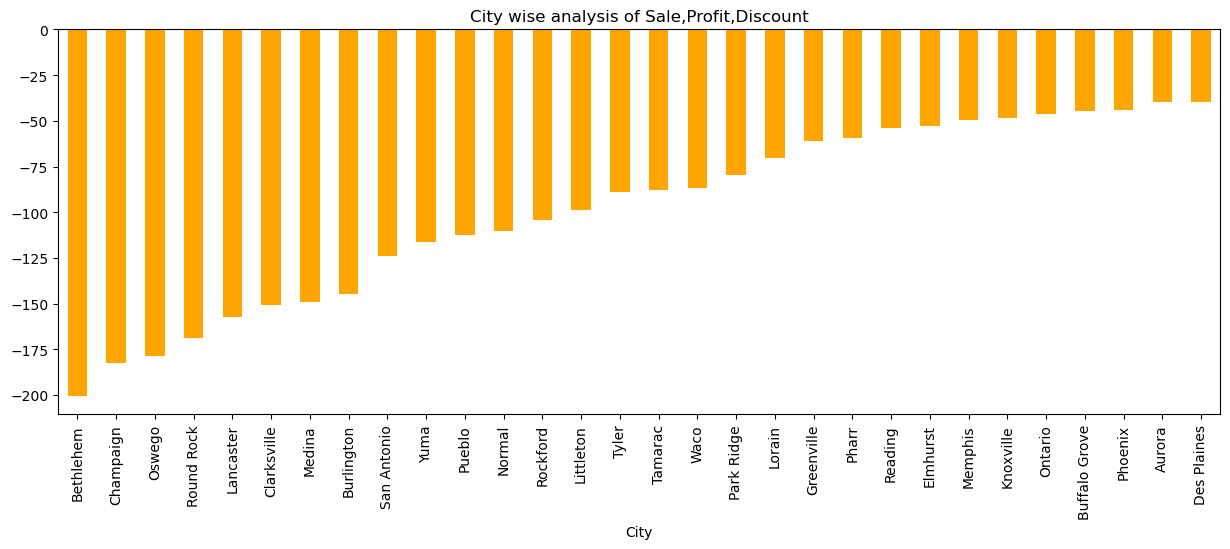

In [105]:
#1.Low Profit
df_city['Profit'].head(30).plot(kind='bar',figsize=(15,5),color='orange')
plt.title('City wise analysis of Sale,Profit,Discount')
plt.show()

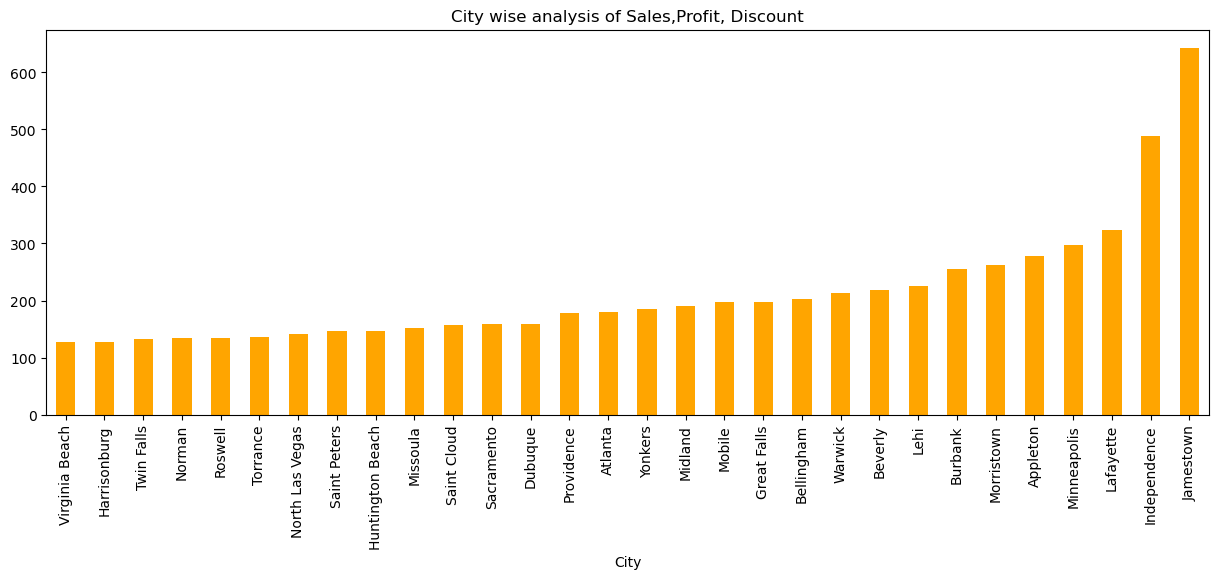

In [108]:
#2. High Profit
df_city['Profit'].tail(30).plot(kind='bar',figsize=(15,5),color='orange')
plt.title('City wise analysis of Sales,Profit, Discount')
plt.show()

30 Cities have profit in positive.<br>
30 Cities have profit in negative.<br>
The balance is pretty good here!

### Quantity wise sales,profit and discount analysis

In [110]:
df_quantity=df.groupby(['Quantity'])[['Sales','Profit','Discount']].mean()
df_quantity.head(10)

,Sales,Profit,Discount
Quantity,,,
1,59.234632,8.276396,0.152959
2,120.354488,16.006831,0.154858
3,175.201578,23.667715,0.153329
4,271.764059,37.131310,0.157708
5,337.936339,40.257394,0.157146
6,362.101960,18.051517,0.166556
7,395.888393,56.579163,0.161980
8,458.210802,42.244342,0.171595
9,498.083683,68.557716,0.147946


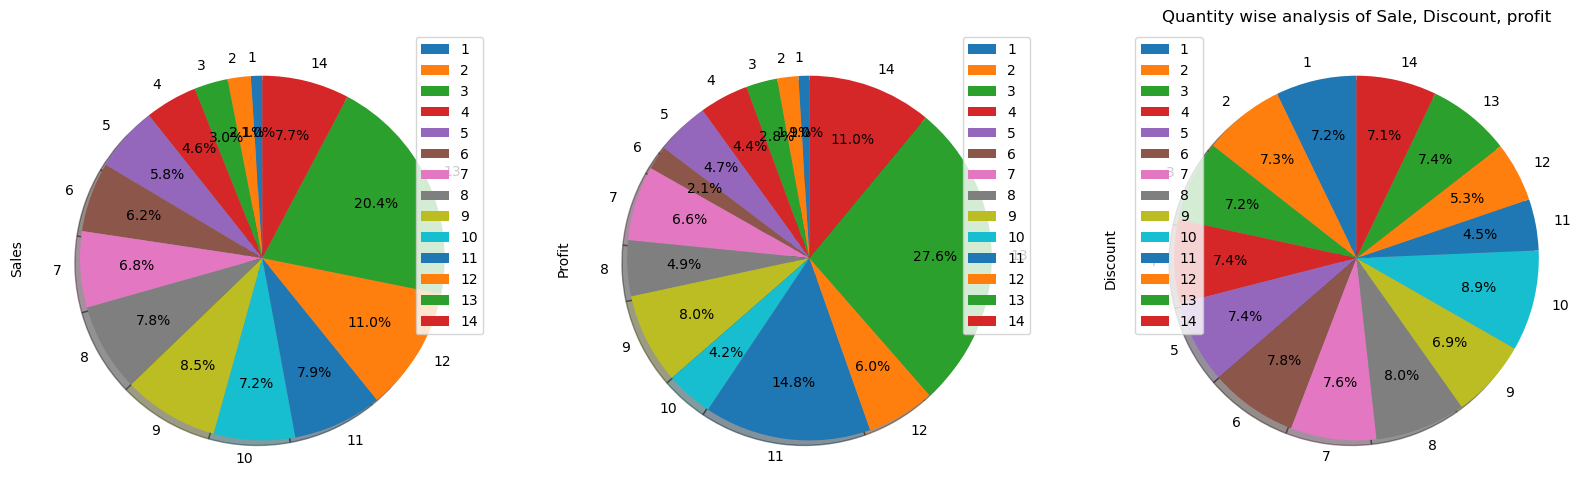

In [111]:
#1. sales 2. Discount 3. Profit
df_quantity.plot.pie(subplots=True, 
                    autopct='%1.1f%%',
                    figsize=(20, 20),
                     pctdistance=0.69,
                    startangle=90,     # start angle 90° (Africa)
                    shadow=True,
                    labels = df_quantity.index)
plt.title('Quantity wise analysis of Sale, Discount, profit')
plt.show()

13 Number of quantity is high for sales and profit.

### CATEGORY WISE SALES,PROFIT AND DISCOUNT

In [112]:
df_category=df.groupby(['Category'])[['Sales','Profit','Discount']].mean()
df_category

,Sales,Profit,Discount
Category,,,
Furniture,349.834887,8.699327,0.173923
Office Supplies,119.324101,20.327050,0.157285
Technology,452.709276,78.752002,0.132323


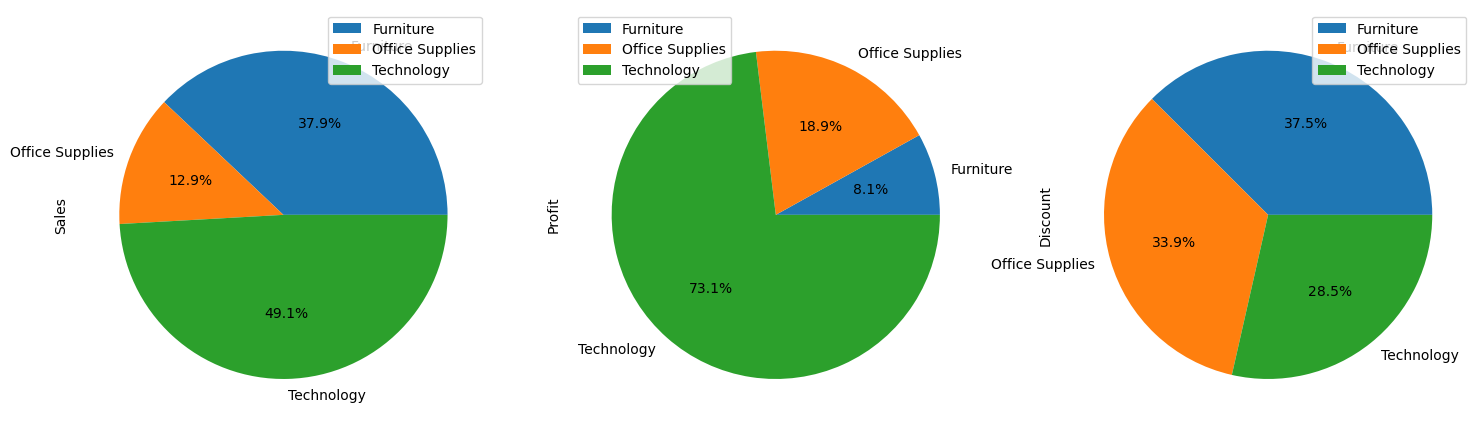

In [114]:
df_category.plot.pie(subplots=True, 
                     figsize=(18, 20), 
                     autopct='%1.1f%%', 
                     labels = df_category.index)
plt.show()

Maximum sales and profit is obtained in Technology.<br>
Minimum profit obtained in future.

### Sub category wise analysis Of Sales,Profit and Discount

In [116]:
df_sub_category = df.groupby(['Sub-Category'])[['Sales', 'Discount', 'Profit']].mean()
df_sub_category.head(10)

,Sales,Discount,Profit
Sub-Category,,,
Accessories,215.974604,0.078452,54.111788
Appliances,230.755710,0.166524,38.922758
Art,34.068834,0.074874,8.200737
Binders,133.560560,0.372292,19.843574
Bookcases,503.859633,0.211140,-15.230509
Chairs,532.332420,0.170178,43.095894
Copiers,2198.941618,0.161765,817.909190
Envelopes,64.867724,0.080315,27.418019
Fasteners,13.936774,0.082028,4.375660


### Based On Sales

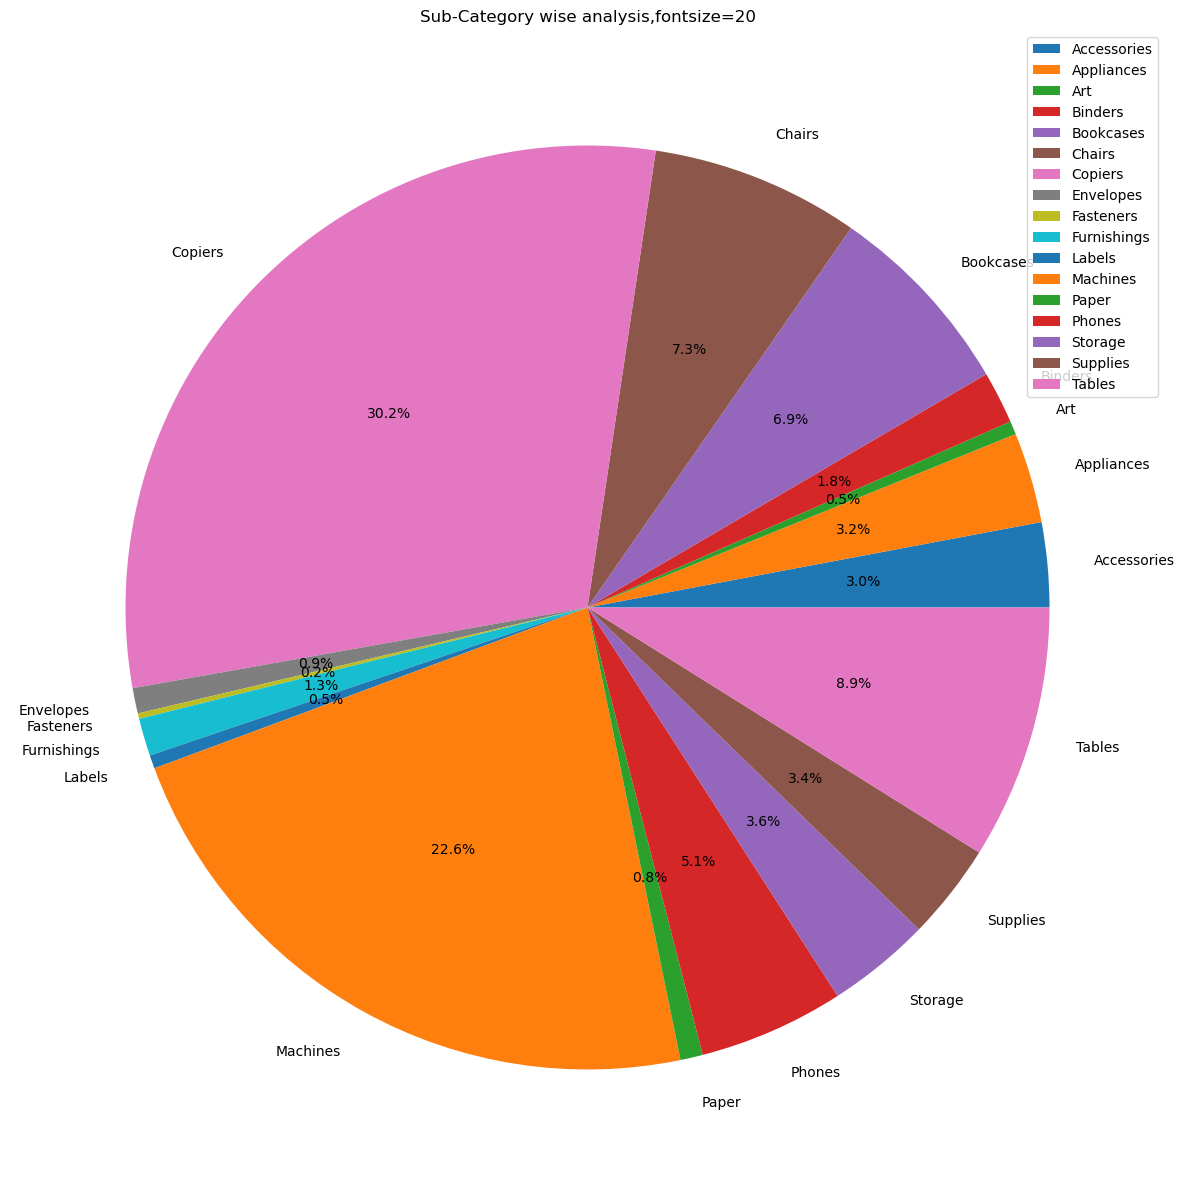

In [118]:
plt.figure(figsize=(15,15))
plt.pie(df_sub_category['Sales'],labels=df_sub_category.index,autopct='%1.1f%%')
plt.title('Sub-Category wise analysis,fontsize=20')
plt.legend()
plt.xticks(rotation=90)
plt.show()

Copier has the highest sales.<br>
Fasteners has the lowest sales.


### Based On The Discount


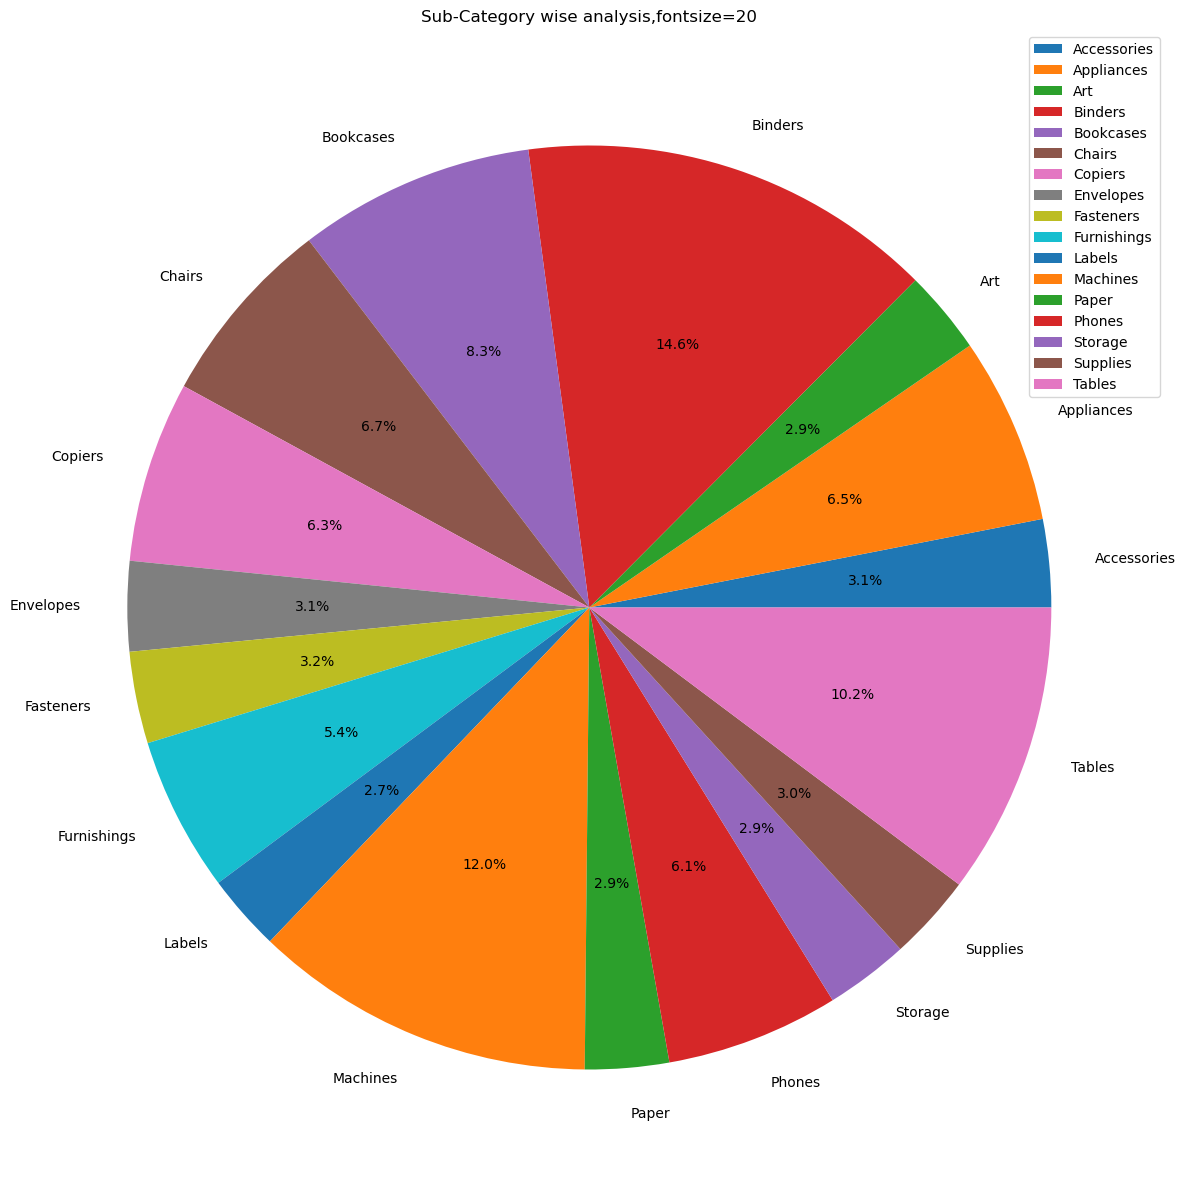

In [120]:
plt.figure(figsize=(15,15))
plt.pie(df_sub_category['Discount'],labels=df_sub_category.index,autopct='%1.1f%%')
plt.title('Sub-Category wise analysis,fontsize=20')
plt.legend()
plt.xticks(rotation=90)
plt.show()

Binders have high discount.

### Based on the profit

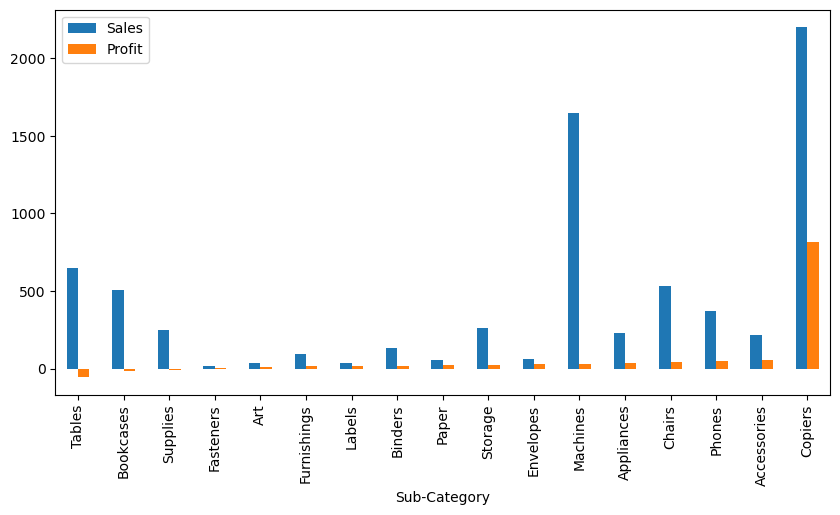

In [124]:
df_sub_category.sort_values('Profit')[['Sales','Profit']].plot(kind='bar',
                                                              figsize= (10,5),
                                                              label=['Avg Sales Price($)','Profit($)'])
plt.show()

### COPIER : HIGHEST PROFIT AS WELL AS SELL

In [126]:
df_region=df.groupby(['Region'])[['Sales','Profit','Discount']].mean()
df_region

,Sales,Profit,Discount
Region,,,
Central,215.772661,17.092709,0.240353
East,238.336110,32.135808,0.145365
South,241.803645,28.857673,0.147253
West,226.493233,33.849032,0.109335


### REGION WISE ANALYSIS

In [128]:
df_region=df.groupby(['Region'])[['Sales','Profit','Discount']].mean()
df_region

,Sales,Profit,Discount
Region,,,
Central,215.772661,17.092709,0.240353
East,238.336110,32.135808,0.145365
South,241.803645,28.857673,0.147253
West,226.493233,33.849032,0.109335


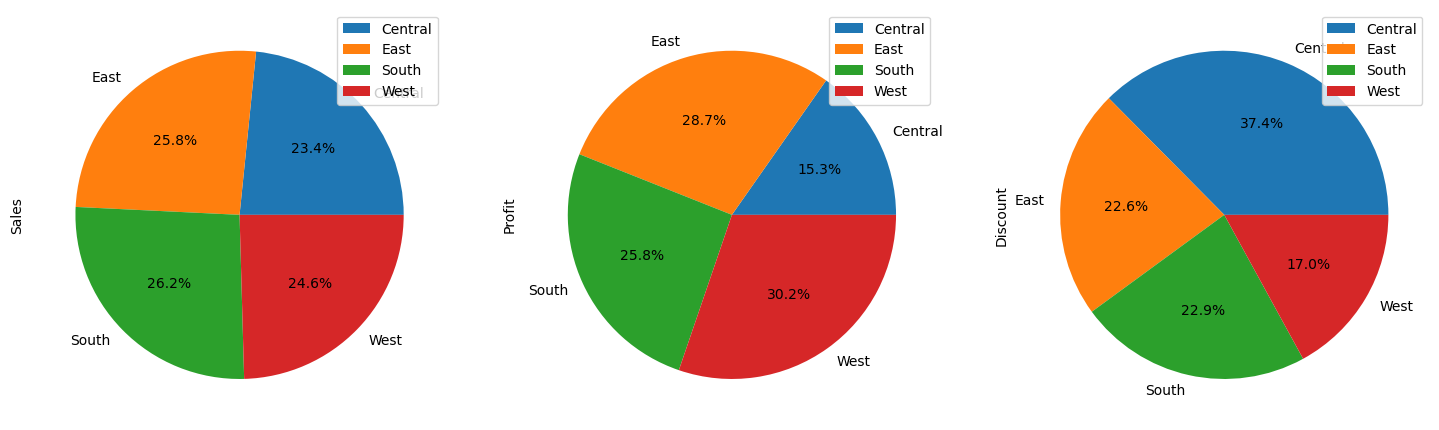

In [131]:
df_region.plot.pie(subplots=True,
                  figsize=(18,20),
                  autopct='%1.1f%%',
                  labels=df_region.index)
plt.show()

Profit is high in WEST.<BR>
Sales is high in SOUTH.<BR>
Discount is high in Central part.

### SHIP MODE WISE ANALYSIS

In [133]:
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [135]:
df_shipmode=df.groupby(['Ship Mode'])[['Sales','Profit','Discount']].mean()
df_shipmode

,Sales,Profit,Discount
Ship Mode,,,
First Class,228.497024,31.839948,0.164610
Same Day,236.396179,29.266591,0.152394
Second Class,236.089239,29.535545,0.138895
Standard Class,227.583067,27.494770,0.160023


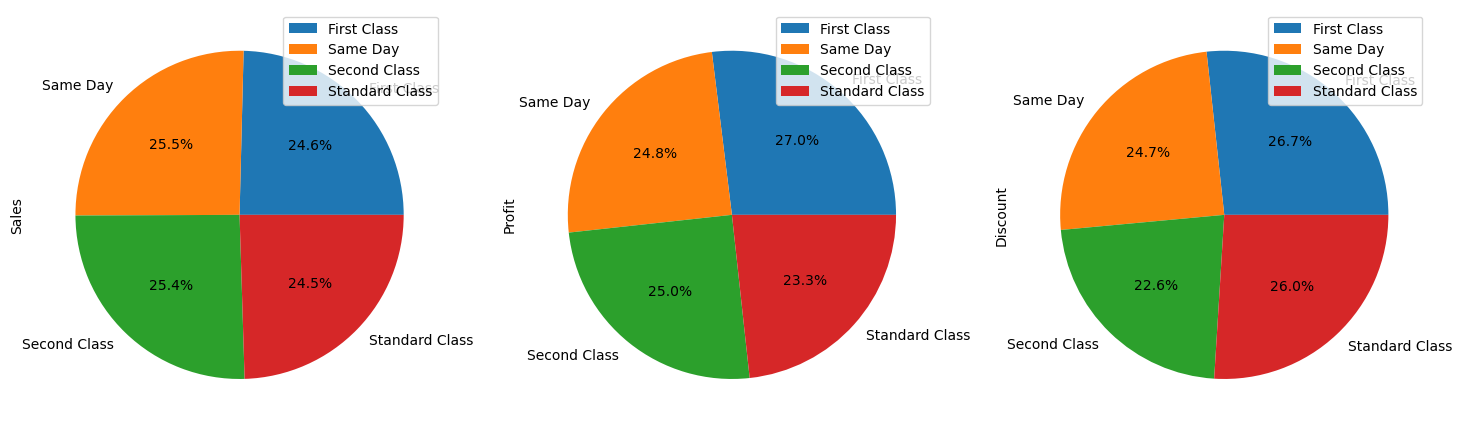

In [137]:
df_shipmode.plot.pie(subplots=True,
                     figsize=(18, 20), 
                     autopct='%1.1f%%', 
                     labels = df_shipmode.index)
plt.show()

Profit and discount is high in first class.<br>
Sales is high for same day ship.

### RESULT

1. Profit is more than that of sale but there are some areas where profit can be increased.<br>
2.Profit and Discount is high in first class.<br>
3.Sales is high for same day ship.<br>
4.Sub Category:Copier:High profit and sales<br>
5.Sub Category:Binder,Machines and then tables have high discount.<br>
6.Category:Maximum sales and Profit obtain in Technology<br>
7.Category:Minimum Profit obtain in furniture.<br>
8.State:Vermont : Highest Profit<br>
9.State:Ohio:Lowest Profit<br>
10.Segment:Home office:High profit and sales<br>


The top 3 cities where deals are highest are<br>
1.New York City<br>
2.Los Angeles<br>
3.Philadelphia<br>
                  

Sales and Profit are moderately correlated.<br>
<br>

The top 3 states where deals are highest are<br>
1.California<br>
2.New York City<br>
3.Texas<br>
<br>

Wyoming : Lowest number of deal,Highest amount of Sales(11.8%)<br>
Lowest amount Of Sales=South Dakota(0.8%)



### CONCLUSION

THE WEAK AREAS WHERE ONE CAN WORK TO MAKE PROFIT ARE:<BR>
    1.We should limit the sales of furniture and increase that of technology and office suppliers as furniture has very less profit.<br>
    2.Considering the sub categories sales of tables should be minimized.<br>
    3.Increase the sales more in the east as profit is second highest.<br>
    4.We should concentrate on the states like 'New York' and 'California' to make profit.